<a href="https://colab.research.google.com/github/Barban09/Procesamiento-de-Imagenes/blob/master/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metodo 1

[-16.1602695    1.74538164   1.48650834]
0.2170079164130147
0.43700000000000006


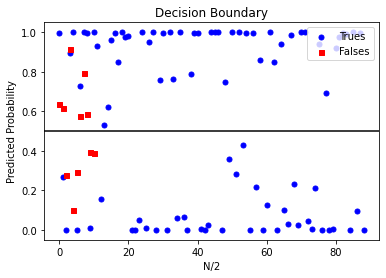

In [165]:
import pandas as pd
import numpy as np
df=pd.read_csv("data_classification.csv", sep=';',header=0)
arr=df.values
YCOL=2
Xb=arr[:,0:YCOL]
Xa=np.ones((len(Xb),1))
X=np.concatenate((Xa,Xb),axis=1)
Y=arr[:,YCOL]
YCOL2=5
thetas=np.array([-12.702, 1.3608, 1.1468])
Num_Iter=2500
alpha=0.5
cinit=112


features=X
labels=Y

for alpha in np.arange(0.4,0.5,0.001):
  weights, costo=train(X, Y, thetas, alpha, Num_Iter)
  if costo[-1]<cinit:
    pesofin=weights
    cinit=costo[-1]
    alphaopt=alpha

print(pesofin)
print(cinit)
print(alphaopt)

contverdaderos=0
contfalsos=0
acum=predict(X,pesofin)  
probabilidad=classify(acum)
trues=[]
falses=[]
for i in np.arange(0,acum.size):
  if probabilidad[i]==Y[i]:
    trues.append(acum[i]) 
    
  else:
    falses.append(acum[i]) 

plot_decision_boundary(trues,falses)

In [144]:
import pandas as pd
import numpy as np
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)


    return weights, cost_history

def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

def predict(features, weights):

  z = np.dot(features,weights)
  return sigmoid(z)

def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost
    
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

def decision_boundary(prob):
  return 1 if prob >= .5 else 0

def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  decision_boundary_v = np.vectorize(decision_boundary)
  return decision_boundary_v(predictions).flatten()

def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

Metodo 2



In [166]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy  as np

# Normalize grades to values between 0 and 1 for more efficient computation
normalized_range = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))

# Extract Features + Labels
labels.shape =  (100,) #scikit expects this
features = normalized_range.fit_transform(features)

# Create Test/Train
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.4,random_state=0)

# Scikit Logistic Regression
scikit_log_reg = LogisticRegression()
scikit_log_reg.fit(features_train,labels_train)

#Score is Mean Accuracy
scikit_score = scikit_log_reg.predict(features_test)
precision=accuracy(scikit_score,labels_test)*100
print('Scikit score: ', precision)

#Our Mean Accuracy
probabilities = predict(features, weights).flatten()
classifications = classify(probabilities)
our_acc = accuracy(classifications,labels.flatten())
print('Our score: ',our_acc)

Scikit score:  90.0
Our score:  0.55


In [ ]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

Ejemplo Scikit Learn

In [149]:
from sklearn.datasets import load_iris #Importando Dataset Load_Iris
from sklearn.linear_model import LogisticRegression #Importo Bloque de Regresion Logistica
X, y = load_iris(return_X_y=True) #Cargando un Dataset (Caracteristica, Etiquetas)
clf = LogisticRegression(random_state=0).fit(X, y) #Entrena el modelo de la Regresion Logistica
clf.predict(X[:2, :]) #Predecir a que etiqueta pertenece cada caracteristica
clf.predict_proba(X[:2, :]) #Retorna la matriz de probabilidades
clf.score(X, y) #Saca la precisión de la Regresion

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

Conclusiones

-Es importante tener en cuenta el tipo de dato con el que trabaja cada funcion, durante el proceso muchos errores se dieron por estar utilizando datos equivocados, adicionalmente para este proceso es importante tener en cuenta la documentacion que existe de cada modulo utilizado aca, como por ejemplo scikit_learn

-Como podemos observar en la Regresion Logistica se puede aplicar mediante la construcción de un codigo propio, en el que podemos ver como el costo va disminuyendo a medidad que el numeo de iteraciones va aumentando, con lo que podemos ver el funcionamiento del algoritmo paso a paso, si bien existe la posibilidad de usar Scikit Learn para obtener todo con unas lineas de codigo, es importante saber como funciona el algoritmo, de ahi la importancia del Punto1